In [23]:
# Lo primero que hacemos es importar todas las librerias necesarias.
#importamos librerias para tratamiento de datos
import numpy as np
import pandas as pd
import re
import math as mat

#importamos librerias la visualizacion de datos
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [24]:
# Abrimos el dataset y hacemos un chequeo rápido para saber cantidad de registros y miramos la composición del mismo.
filename = "../../dataset/properati.csv"
data = pd.read_csv(filename)

display(data.sample(n=6))
print(f"(Cantidad de Filas, Cantidad de columnas) -> {data.shape}")

Unnamed: 0 operation property_type       place_name  \
47854       47854      sell            PH         Victoria   
66050       66050      sell     apartment         Belgrano   
34401       34401      sell     apartment       San Miguel   
82439       82439      sell     apartment  Lomas de Zamora   
77299       77299      sell     apartment          Palermo   
10700       10700      sell     apartment     Palermo Soho   

                                 place_with_parent_names country_name  \
47854  |Argentina|Bs.As. G.B.A. Zona Norte|San Fernan...    Argentina   
66050               |Argentina|Capital Federal|Belgrano|    Argentina   
34401    |Argentina|Bs.As. G.B.A. Zona Norte|San Miguel|    Argentina   
82439  |Argentina|Bs.As. G.B.A. Zona Sur|Lomas de Zam...    Argentina   
77299                |Argentina|Capital Federal|Palermo|    Argentina   
10700   |Argentina|Capital Federal|Palermo|Palermo Soho|    Argentina   

                     state_name  geonames_id                  lat-lon  \
47854  Bs.As. G.B.A. Zona Norte    3427500.0                      NaN   
66050           Capital Federal    3436077.0                      NaN   
34401  Bs.As. G.B.A. Zona Norte          NaN   -34.543055,-58.7118577   
82439    Bs.As. G.B.A. Zona Sur          NaN  -34.7642209,-58.4003143   
77299           Capital Federal    3430234.0                      NaN   
10700           Capital Federal    3430234.0    -34.581327,-58.423519   

             lat  ...  surface_covered_in_m2  price_usd_per_m2 price_per_m2  \
47854        NaN  ...                  185.0        918.918919   918.918919   
66050        NaN  ...                   68.0       2253.521127  2352.941176   
34401 -34.543055  ...                    NaN               NaN          NaN   
82439 -34.764221  ...                    NaN               NaN          NaN   
77299        NaN  ...                   59.0       3472.857143  4120.338983   
10700 -34.581327  ...                   32.0               NaN  3894.062500   

       floor  rooms  expenses  \
47854    NaN    NaN       NaN   
66050    NaN    NaN    2600.0   
34401    NaN    NaN     800.0   
82439    NaN    NaN       NaN   
77299    NaN    NaN       1.0   
10700    NaN    1.0       NaN   

                                           properati_url  \
47854  http://www.properati.com.ar/1997y_venta_ph_vic...   
66050  http://www.properati.com.ar/1ada4_venta_depart...   
34401  http://www.properati.com.ar/18bw3_venta_depart...   
82439  http://www.properati.com.ar/1az86_venta_depart...   
77299  http://www.properati.com.ar/1asnx_venta_depart...   
10700  http://www.properati.com.ar/168re_venta_depart...   

                                             description  \
47854  - Toma departamento en parte de pago, zona Oli...   
66050  4 Ambientes en excelente ubicación: Amenabar y...   
34401  PISO 7 ORIENTACIÓN SUDOESTE. DE 22 M2. EasyBro...   
82439  Importante piso sobre Colombres 320 piso 2do.,...   
77299  FINANCIACIÓN. 30% anticipo + 20 cuotas en peso...   
10700  Venta - Departamento - Argentina, Buenos Aires...   

                                                   title  \
47854  PH 185m² en 3 De Febrero 3000, San Fernando, V...   
66050  Venta: 4 Ambientes super luminoso - 2 cuadras ...   
34401                          DEPARTAMENTO MONOAMBIENTE   
82439                           Depto en Venta - Lomitas   
77299                             Departamento - Palermo   
10700      Departamento en Venta ubicado en Palermo Soho   

                                         image_thumbnail  
47854  https://thumbs4.properati.com/4/j7_ogT3lGeJNva...  
66050  https://thumbs4.properati.com/3/DkXUNoMZoI6gyj...  
34401  https://thumbs4.properati.com/0/OGxwFGDBQDRVz0...  
82439  https://thumbs4.properati.com/0/1rZDhgFVxHHwu-...  
77299  https://thumbs4.properati.com/0/iVSUFUsub8LiFp...  
10700  https://thumbs4.properati.com/5/qwOsTHKyObhOhH...  

[6 rows x 26 columns]

(Cantidad de Filas, Cantidad de columnas) -> (121220, 26)


In [25]:
# Columna surface_covered_in_m2: revisamos que opciones tiene, o si se repite lo mismo.
print(f'Cantidad de registros con NaN: {data.surface_covered_in_m2.isnull().sum()}')
print(f'Porcentaje de registros con NaN: {data.surface_covered_in_m2.isnull().mean()*100}')
print("Contamos cantidad de registros unicos:")
print(data.groupby(['surface_covered_in_m2']).size().reset_index(name='count'))

Cantidad de registros con NaN: 19907
Porcentaje de registros con NaN: 16.422207556508827
Contamos cantidad de registros unicos:
     surface_covered_in_m2  count
0                      0.0      2
1                      1.0    367
2                      2.0     12
3                      3.0      7
4                      4.0     10
..                     ...    ...
990                30000.0      1
991                35000.0      1
992                38240.0      1
993                49000.0      1
994               187000.0      1

[995 rows x 2 columns]


<AxesSubplot:xlabel='state_name'>

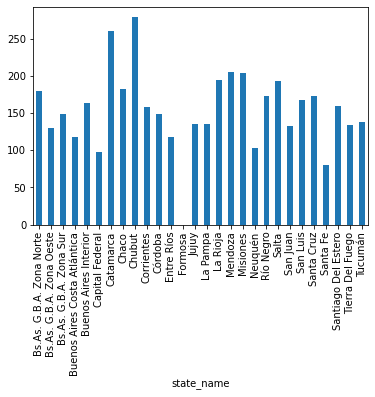

In [26]:
#graficamos el dato por Estado con el fin de observar los rangos de areas de superficie cubierta. Se observa como en los etados de Catamarca y de Chubut las areas exceden el promedio de los demás estados.
data.groupby('state_name')['surface_covered_in_m2'].mean().plot.bar()

In [27]:
# Al visualizar esta grafica podemos observar como en esta columna existen valores extremos con 
# un apartamento ubicado en la latitul -34.59457 y lon -58.40917 con un area cubierta de 187.000m2 que resulta ser un error de digitación,
# ya que al revisar en la descripción se aclara que es un apartamento de 187m2 
# Tambien encontramos una casa con valor de 0 en lat -4.54 y lon de -75.67
import plotly.express as px
fig = px.scatter_3d(data, x='lat', y='lon', z='surface_covered_in_m2',
                    color='property_type')
fig.show()

In [28]:
#podemos corregir el valor de ese dato para lo cual primero vamos a localizarlo
data[data.surface_covered_in_m2==187000]

Unnamed: 0 operation property_type    place_name  \
76012       76012      sell     apartment  Barrio Norte   

                        place_with_parent_names country_name       state_name  \
76012  |Argentina|Capital Federal|Barrio Norte|    Argentina  Capital Federal   

       geonames_id                       lat-lon        lat  ...  \
76012    3436109.0  -34.5945726028,-58.409166395 -34.594573  ...   

       surface_covered_in_m2  price_usd_per_m2 price_per_m2  floor  rooms  \
76012               187000.0               NaN     3.208556    NaN    NaN   

       expenses                                      properati_url  \
76012   11000.0  http://www.properati.com.ar/1ar12_venta_depart...   

                                             description  \
76012  Barrio Norte EXCELENTE Semipiso al Frente Balc...   

                                title  \
76012  Excelente PISO en Barrio Norte   

                                         image_thumbnail  
76012  https://thumbs4.properati.com/0/Z9TPL-aDoGIWcI...  

[1 rows x 26 columns]

In [29]:
#Ahora vamos a corregir el dato con at
data.at['76012','surface_covered_in_m2']=187

# Detalle de análisis de columnas:
* `surface_covered_in_m2 ` -> Esta columna tiene 19.907 datos nulos o su equivalente 16,42%. Esta variable se emplea para calcular el precio por m2, tomando como base el precio aprox en U$D asi que es una columna relevante. Tiene un valor máximo de 187.000 metros cuadrados valor que se aleja de la media de 133 metros cuadrados.

Esta columna podriamos completarla extrayendo datos de las columnas title y description, tambien calculando el valor tomando el precio en USD y el valor del metro cuadrado 

### Detalle de valores extremos en la  columna `surface_covered_in_m2`:

En el catplot elaborado para esta variable comparada por tipo de propiedad podemos observar especialmente el area de un apartamento cuya area sobrepasa los 180.000 metros cuadrados.

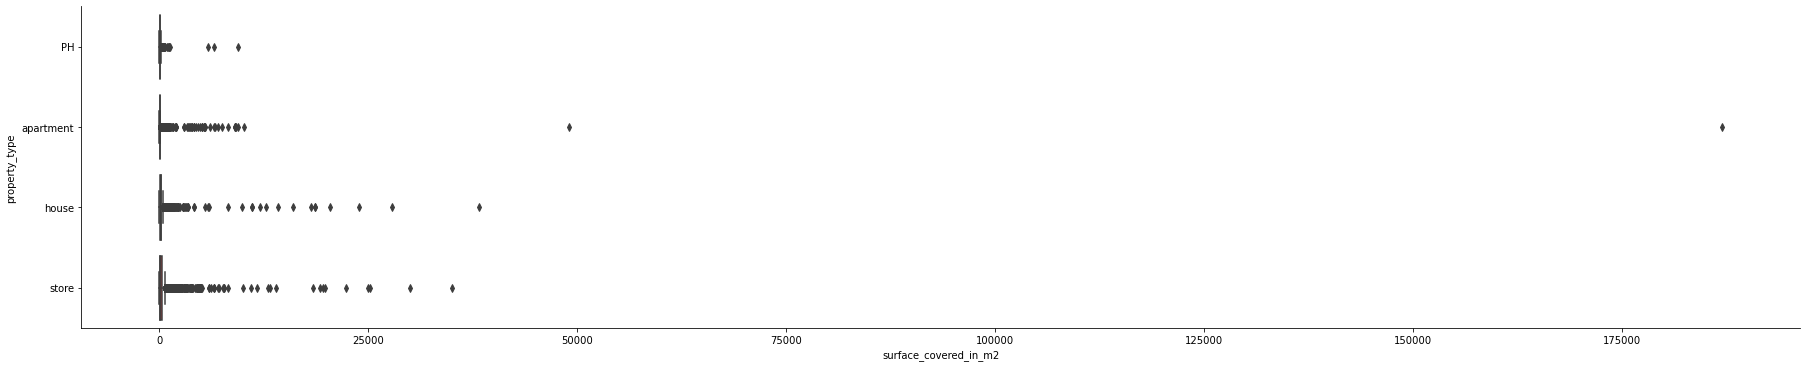

In [36]:
sns.catplot(data=data, x= 'surface_covered_in_m2', y="property_type", kind="box", height=5, aspect=5,)


### Regex para rellenar la columna `surface_covered_in_m2`:

Vamos a extraer datos de las columnas title y description para extraer esta información, para ello tomaremos las diferentes denominaciónes de metros cuadrados: (m,M,mts, Mts, metros, Metros, METROS), tambien se emplean las terminaciones despues del número 2 (c,cub,cubiertos)

In [37]:
# Buscamos superficies cubiertas en metros cuadrado en los titulos y en la descripción

#el area más pequeña es de 1 m2, 161 aptos, 146 casas, deberiamos sacar el dato para aquellas que sean null o tengan menos de 10 m2 trae a la base m2, debemos eliminarlos y transformar . a , ???

data[['description', 'title']] = data[['description', 'title']].apply(lambda x: x.astype(str))

patron = r'([0-9]*\.?\,?[0-9]*)\s?[m|M|mts|Mts|metros|Metros|METROS]\.?\S*2\S*[c|cub|cubiertos]'

regex = re.compile(patron, flags = re.IGNORECASE)

superficie_cubierta_titulo=data['title'].replace(np.NAN,"").apply(lambda x: regex.findall(x)[0] if regex.findall(x) else np.NaN)
data['surface_covered_in_m2'].fillna(superficie_cubierta_titulo, inplace=True)

superficie_cubierta_descripcion=data['description'].replace(np.NAN,"").apply(lambda x: regex.findall(x)[0] if regex.findall(x) else np.NaN)
data['surface_covered_in_m2'].fillna(superficie_cubierta_descripcion, inplace=True)

In [38]:
#luego de aplicar el regex se logran recucir el porcentaje de nans al pasar del 16.42% al 15.80%.
print (f'% de valores nulos que quedan luego de aplicar regex: {data.surface_covered_in_m2.isna().sum()/data.surface_covered_in_m2.shape[0]*100}')
print (f'entradas: {data.surface_covered_in_m2.shape[0]}')

% de valores nulos que quedan luego de aplicar regex: 15.808317040776762
entradas: 121221


In [39]:
#Vamos a transformar los datos de la columna ya que al extraer datos de regex se convirtieron en tipo object
data['surface_covered_in_m2'] = pd.to_numeric(data['surface_covered_in_m2'],errors = 'coerce')

In [40]:
#luego de aplicar el regex y transformar los datos a floats se logran recucir el porcentaje de nans al pasar del 16.42% al 15.80%.
print (f'% de valores nulos que quedan luego de aplicar regex: {data.surface_covered_in_m2.isna().sum()/data.surface_covered_in_m2.shape[0]*100}')
print (f'entradas: {data.surface_covered_in_m2.shape[0]}')

% de valores nulos que quedan luego de aplicar regex: 15.988153867729189
entradas: 121221


### Conclusión `surface_covered_in_m2`:

#luego de aplicar el regex y transformar los datos a floats se logran recucir el porcentaje de nans al pasar del 16.42% al 15.98%.
#estos valores se mantendran y se emplearan para el calculo del price_aprox_usd, junto con el valor de price_per m2